In [18]:
#######

## import packages
import subprocess
import os
import pandas as pd

import itertools
import glob
import numpy as np
import sklearn

In [19]:
data_for_modellingV3 = pd.read_csv('/home/maeve/svm_testing/testrepo/modelling_data.csv')

In [3]:
import sklearn.model_selection
samplelist = data_for_modellingV3["recNumsR"].unique()
training_samp, test_samp = sklearn.model_selection.train_test_split(samplelist, train_size=0.8, test_size=0.2, random_state=5, shuffle=True)

training_data = data_for_modellingV3[data_for_modellingV3['recNumsR'].isin(training_samp)]
test_data = data_for_modellingV3[data_for_modellingV3['recNumsR'].isin(test_samp)]

In [4]:
totalLength = len(data_for_modellingV3)
trainingLength = len(training_data)
print('training rows', trainingLength)
testgLength = len(test_data)
print('test rows', testgLength)
print('split training: ', round(trainingLength/totalLength,2), 'vs test: ', round(testgLength/totalLength,2))

training rows 586014
test rows 183750
split training:  0.76 vs test:  0.24


In [5]:
features_to_keep = ['RR_capped', 'normalised_RRTime', 'normalised_RPeakAmp','rmssdNorm_capped', 'mawsdNorm_capped', 'meanHR', 'turningPointRatio',
       'hrTurningRatio', 'hrRange_capped','petrenasAFScore','solosenkoAFScore']

# create training data and test data and remove record numbers from feature list
X_train, X_test, y_train, y_test = training_data[features_to_keep], test_data[features_to_keep], training_data['target_variable'], test_data['target_variable']


In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [7]:
grid.fit(X_train, y_train)
print('score =', grid.score(X_test,y_test))
print(grid.best_params_)

KeyboardInterrupt: 

In [20]:

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

In [9]:
import pickle

In [11]:
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(reg_svc, fid)    

# load it again
#with open('my_dumped_classifier.pkl', 'rb') as fid:
#    gnb_loaded = cPickle.load(fid)


In [12]:
from sklearn import metrics

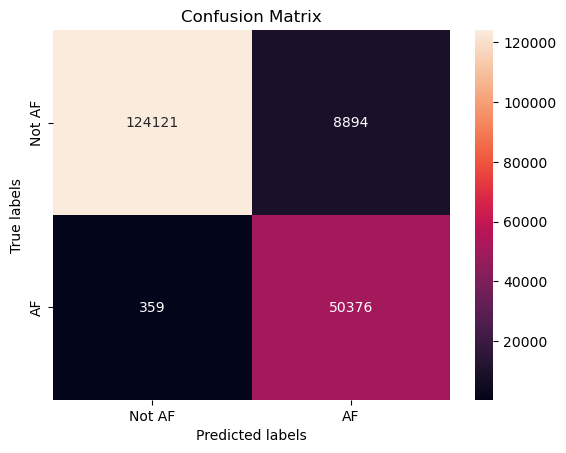

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt     

cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not AF', 'AF']); ax.yaxis.set_ticklabels(['Not AF', 'AF']);


In [15]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
sensitivity = round((TP/(TP+FN))*100,4)
specificity = round((TN/(FP+TN))*100,4)
ppv = round((TP/(TP+FP))*100,4)
print('Sensitivity: ', sensitivity, ', Specificity: ' ,specificity,', PPV: ' ,specificity)

Sensitivity:  99.2924 , Specificity:  93.3135 , PPV:  93.3135
